In [1]:
import networkx as nx
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from collections import deque
import sys
import time
from tqdm import tqdm_notebook as tqdm
import random as rdm

## Write a script to generate an p-Erdos-Renyi random graph

In [2]:
#p-ER random graph
#create a random graph with n nodes; each node is linked to another node with probability p.
def p_er(n,p):
    G=nx.empty_graph(n)
    #iterate through all pair nodes
    for u in range(n-1):
        for v in range(u+1,n):
            yes = np.random.choice([1, 0], 1, p=[p, 1-p])  #if yes=1 (p) add edges to nodes.if p increases increase also the probability to generate a connected graph
            if yes==1:
                G.add_edge(u,v)
    return G

## Write a script to generate an r-regular random graph

In [3]:
def try_build_graph(n, r):
    g = nx.Graph()
    g.add_nodes_from(range(n)) #adds n nodes
    for j in range(n):
        nodes = nx.nodes(g) #num di nodes
        rdm.shuffle(nodes) #shuffle --> mischio lista dei nodi
        nodes.remove(j) #i do not want to take (j, j) pair
        
        for i in range(len(nodes)): #lst of nodes that now are not anymore sort but are shuffled --> random
            if nx.degree(g)[j] < r:
                #check deggre of j --> j is the in which i am
                if nx.degree(g)[nodes[i]] < r: #take first node in the shuffled list and check num of degree
                    g.add_edge(j, nodes[i])
            else:
                break
    return g #dict k = node v=list of connected nodes

In [202]:
def check_g(g, r):
    check = 0 #connected
    for i in range(len(g.nodes())): #check if the len of the value is the same for each node so i know the degreee
        if (len(g.edge[i])) != r:
            check = 1
            break
    if check == 1:
        return False
    if check == 0:
        return True

In [203]:
def random_regular_graph(n, r):
    if (n*r)%2 == 1:
        print ('n x e must be even, unlucky!')
        return False
    if n == 1:
        print ('It is not possible to build a graph with only one node')
        return False
    g = try_build_graph(n, r)
    while check_g(g, r) == False:
        g = try_build_graph(n, r)
    return g

## Write a script to check the connectivity of a given graph

### First algebraic method: irreducibility

In [175]:
#check connectivity with irreducibility
# CONNECTIVITY --> a node must have at least one degree
#irreducibility --> the graph is connected if adj matrix is irreducibility --> I + sum_i_n-1(A)^i > 0 (each element)
#adj matrix --> in a graph without weight got 1 when two nodes are connected and 0 when not

def check_connectivity_irreducibility(graph, printres=False):
    adj = nx.adjacency_matrix(graph).todense()
    n = len(adj)
    a = np.identity(n)
    somma = adj
    adjp = adj
    for i in range(1,n-1): #first step adjp is equal to adj^1
        adjp = adjp * adj
        somma += adjp
    a = somma + a
    if printres == True:
        if a.all()>0:       
            return print ('The graph is connected...')
        else:
            return print ('The graph is not connected...')
    else:
        if a.all()>0:
            return True
        else:
            return False


### Second algebraic method: eigen-value of the Laplacian matrix

In [176]:
#check connectivity with laplacian --> a matrix that has in the diagonal the number of the degree of node_i
#                                      and -1 when they are connected and 0 when they are not

#when the second smallest eigenvalue is > 0 it means that the graph is connected 

def check_connectivity_laplacian(graph, printres=False):
    L = nx.laplacian_matrix(graph).todense()
    eigenvalues = la.eig(L)[0]
    sec_eig = np.round(np.sort(eigenvalues)[1], 10) #second smallest eigenvalue
    if printres == True:
        if sec_eig > 0:       
            return print ('The graph is connected!')
        else:
            return print ('The graph is not connected!')
    else:
        if sec_eig > 0:       
            return True
        else:
            return False
        

### Breadth-first search algorithm

In [177]:
#check connectivity with bfs --> Breadth First Search. starts from a node and visits his neighbour (and then put it in visited
#                                and in queue) it works until the queue is empty

def check_connectivity_bfs(graph, printres=False):
    start=0
    visited = set()
    q = deque([])
    lst = graph[start]
    visited.add(start)
    for i in lst:
        q.append(i)
        #print('queue:\n', q)
        visited.add(i)
        #print('visited: ', visited)
    while q: 
        pointer = q.popleft()
        #print('vertex:\n', pointer)
        for neighbour in graph[pointer]: 
            if neighbour not in visited: 
                visited.add(neighbour)
                q.append(neighbour)
                #print('queue:\n',q)
                #print('visited: ', visited)
    if printres == True:
        if visited == set(graph.nodes()):       
            return print ('The graph is connected.')
        else:
            return print ('The graph is not connected.')
    else:
        if visited == set(graph.nodes()):
            return True
        else:
            return False

#### Create random regular graph and check its connectivity

/home/riccardogobbo17/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/riccardogobbo17/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/riccardogobbo17/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


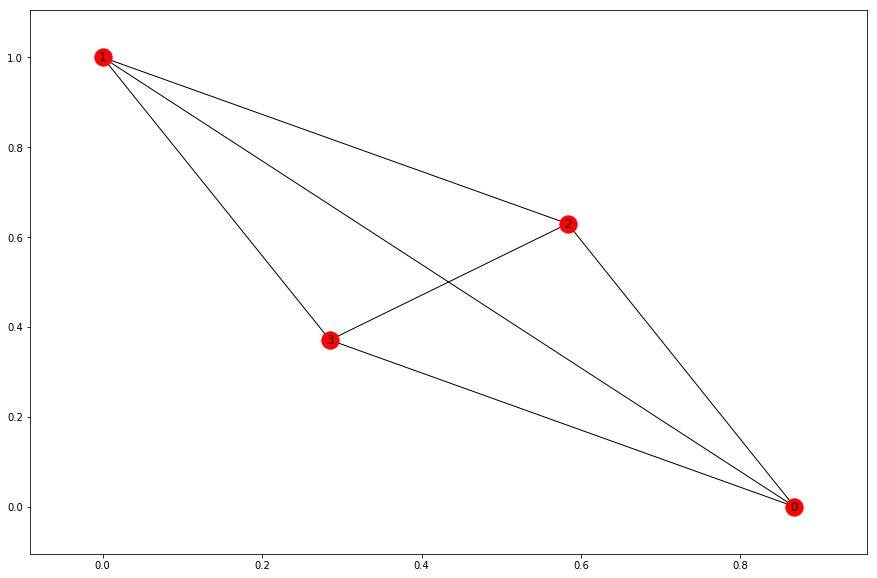

The graph is connected...
The graph is connected!
The graph is connected.


In [208]:
#create a random regular graph and check his connectivity
G = random_regular_graph(4, 3)

plt.rcParams['figure.figsize'] = 15, 10
nx.draw_networkx(G)
plt.show()
check_connectivity_irreducibility(G, True)
check_connectivity_laplacian(G, True)
check_connectivity_bfs(G, True)

#### Create random p-Erdos graph and check its connectivity

/home/riccardogobbo17/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/riccardogobbo17/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/riccardogobbo17/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


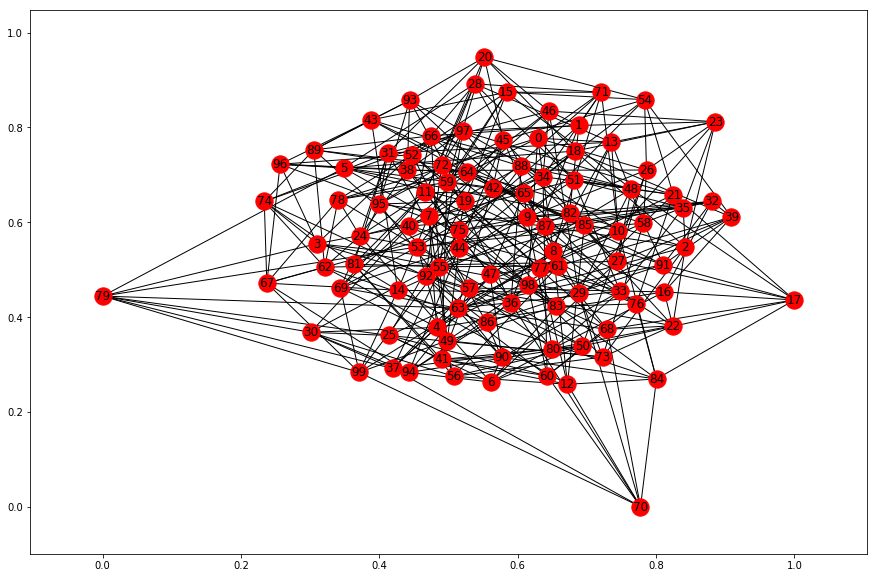

The graph is connected...
The graph is connected!
The graph is connected.


In [179]:
F = p_er(100, 8/99)

plt.rcParams['figure.figsize'] = 15, 10
nx.draw_networkx(G)
plt.show()
check_connectivity_irreducibility(G, True)
check_connectivity_laplacian(G, True)
check_connectivity_bfs(G, True)

## Compare the complexity of connectivity checking method as a function of n

In [180]:
#complexity connectivity bfs

def time_complexity_bfs(n):
    
    time_n = []
    for i in range(2, n):
        graff = p_er(i, 0.1)
        
        start = time.time()
        
        check_connectivity_bfs(graff, printres = False)
        
        end = time.time()
        time_n.append(end-start)
#     plt.plot(time_n.keys(), time_n.values())
#     plt.plot(time_n.keys(), time_n.values())
#     plt.title('time_complexity_irreducibility')
#     plt.xlabel('n')
#     plt.ylabel('time')
#     plt.show
    return time_n

In [181]:
#complexity connectivity laplacian

def time_complexity_laplacian(n):
    
    time_n = []
    for i in range(2, n):
        graff = p_er(i, 0.1)
        start = time.time()
        
        check_connectivity_laplacian(graff, printres = False)
        
        end = time.time()
        time_n.append(end-start)
#     plt.plot(time_n.keys(), time_n.values())
#     plt.plot(time_n.keys(), time_n.values())
#     plt.title('time_complexity_irreducibility')
#     plt.xlabel('n')
#     plt.ylabel('time')
#     plt.show
    return time_n

In [182]:
#complexity connectivity bfs irreducibilty

def time_complexity_irreducibility(n):
    
    time_n = []
    for i in range(2, n):
        graff = p_er(i, 0.1)
        start = time.time()
        
        check_connectivity_irreducibility(graff, printres = False)
        
        end = time.time()
        time_n.append(end-start)

    return time_n

In [183]:
def plot_time_complexity():
    l = list(range(2, 100))
    
    plt.rcParams['figure.figsize'] = 12, 9
    
    a = time_complexity_bfs(100)
    plt.plot(l, a)
    
    b = time_complexity_irreducibility(100)
    plt.plot(l, b)
    
    c = time_complexity_laplacian(100)
    plt.plot(l, c)
    
    plt.gca().legend(('bfs','irreducibility', 'laplacian'))
    plt.title('time complexity')
    plt.xlabel('n')
    plt.ylabel('time')
    plt.show

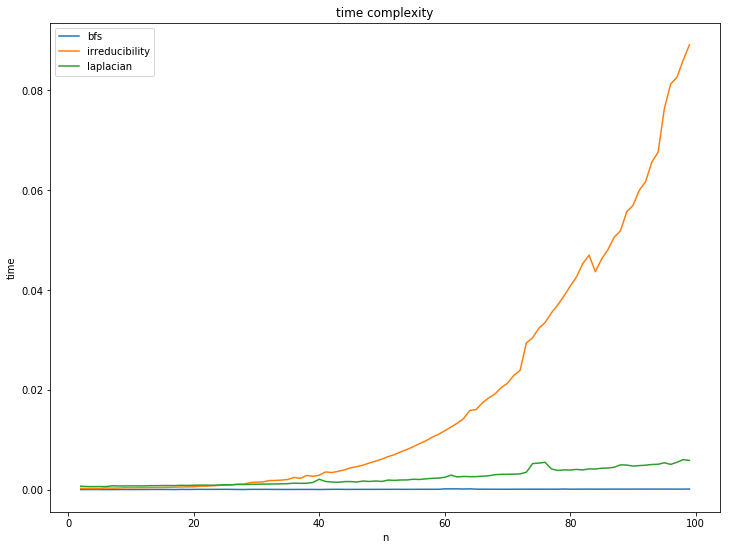

In [39]:
plot_time_complexity()

## Probability that a graph is connected

### Plot of probability of beeing connected of a p-Erdos graph with a given number of nodes (n = 100) and an increasin probability p

In [184]:
p = np.arange(0.00, 0.2, 0.01)
# probability is given in input. when probability increases we want to see if the graph is still connected
def plot_gvsp(p):
    mean_dict = {}
    for prob in tqdm(p):
        res = []
        for i in range(100):
            z = p_er(100, prob)
            res.append(check_connectivity_laplacian(z))
            #print(res)
        mean_dict[prob] = np.mean(res, dtype=np.float64)
    plt.rcParams['figure.figsize'] = 10, 7
    plt.plot(mean_dict.keys(),mean_dict.values())
    plt.title('p_er(100,p)')
    plt.xlabel('p')
    plt.ylabel('prob to be connected')
    plt.show 

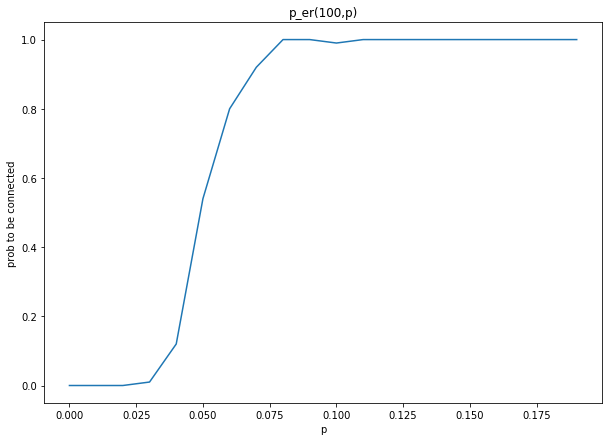

In [18]:
plot_gvsp(p)

### Plot of probability of beeing connected of a r-regular graph with given values of r = [2, 4, 8, 16] and an increasing number of nodes (till 100)

In [24]:
#random regular graph
#given a list of d --> how many edges each nodes has to have
#we want to know the probability that the graph is connected when n increases

def plot_vsn():
    mean_dict2 = {}
    d = [2, 4, 8, 16]
    for j in tqdm(d): #iterate over given d
        res1 = []
        n = np.arange(j+1, 101)
        for i in n: #iterate over seq of n that goes from d+1 to 100 (d+1 rr)
            for sim in range(100) #simulation
                zz = random_regular_graph(i, j)
                res1.append(check_connectivity_bfs(zz)) #check f is connected with bfs(faster)
                #print(res)
            mean_dict2[i] = np.mean(res1, dtype=np.float64)
        
        ind = d.index(j)+1
        
        plt.rcParams['figure.figsize'] = 15, 10
        plt.subplot(2, 2, ind)
        plt.plot(mean_dict2.keys(),mean_dict2.values())
        plt.xlabel('n')
        plt.ylabel('prob')
        title = "d = " + str(j)
        plt.title(title)
        
    plt.show
    return None

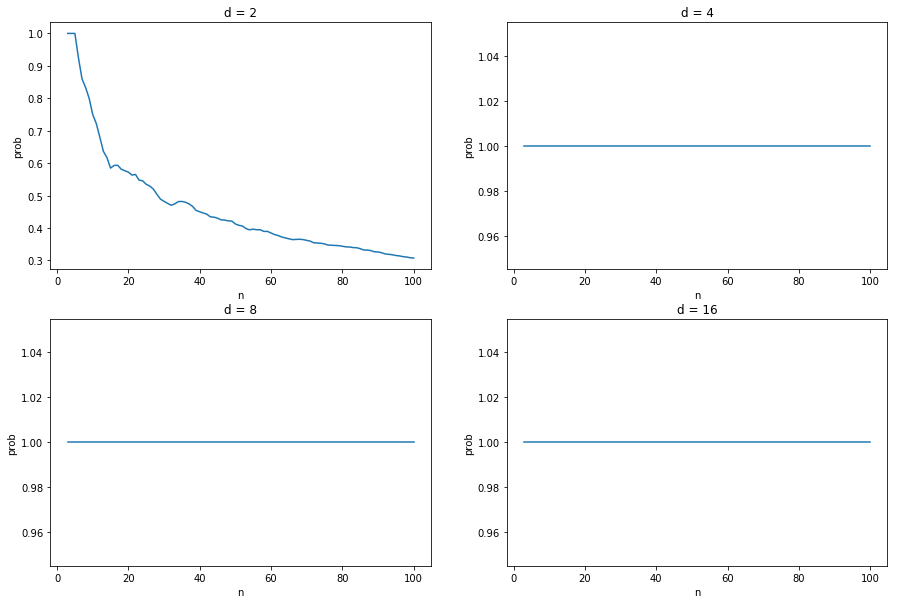

In [25]:
plot_vsn()

## Throughput performance 

TH $\leq$ m / (h_bar * vf) where m is the number of links of the network graph, h_bar is the mean path length and
vf = n*(n-1)/2 as the number of flows.
m is different if we consider an p-Erdos graph or an r-regular graph, m = pn(n-1)/2 and m = nr/2 respectively.

In [185]:
#mean of all the shortest path for all possible non ordered pair of nodes

def calculate_h__(graph):
    n = len(graph.nodes())
    res = []
    for i in range(n-1):
        for j in range(i+1, n):
            if nx.has_path(graph, i, j) == True:
                H = len(nx.shortest_path(graph, i, j))-1
                res.append(H)
    h_mean = np.mean(res)
    return h_mean    

In [188]:
#TH rate of successfull message delivery over the communication channel (network)
#plot the application throughput bound TH versus n for the two graph model

def TH_create_plot(upto=100, gtype='p_er'):
    n = list(np.arange(9, upto))
    lst_th = {}
    for i in n: #iterate over n nodes
        res = []
        for sim in range(30):
            p = 8 / (i - 1) #given prob for p_er
            r = 8 #given r(#edges for each node) given for p_rr

            if gtype == "p_er":
                graf = p_er(i, p)
            else:
                graf = random_regular_graph(i, r)

            while check_connectivity_bfs(graf) == False: #otherwise cannot calculate shortest path
                if gtype == "p_er":
                    graf = p_er(i, p)
                else:
                    graf = random_regular_graph(i, r)

            vf = (i * (i - 1)) / 2.0 
            #m --> num of links of the network graph
            m_p_er = len(graf.edges())
            m_p_rr = (i * r) / 2.0

            h_ = calculate_h__(graf) 

            if gtype == "p_er":
                TH = m_p_er / float(h_ * vf)
            else:
                TH = m_p_rr / float(h_ * vf)
            
            res.append(TH)

        lst_th[i] = np.mean(res)
    
    
    return plt.plot(lst_th.keys(), lst_th.values())

In [189]:
def plot_TH():
    plt.rcParams['figure.figsize'] = 15, 9    
    a = TH_create_plot(100)
    b = TH_create_plot(100,"p_rr")
    plt.gca().legend(('erdos','regular'))
    plt.title('TH vs n')
    plt.xlabel('n')
    plt.ylabel('TH')
    plt.show


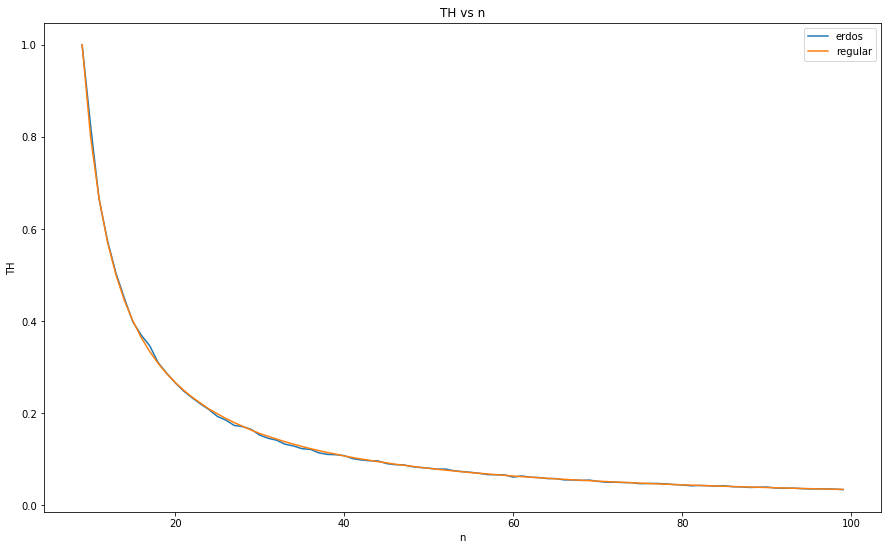

In [193]:
plot_TH()

## Reliability performance

In [190]:
def remove_link(graph, n, p) :
    for u in range(n-1):
        for v in range(u+1,n):
            if u in graph[v]:
                yes = np.random.choice([1, 0], 1, p=[p, 1-p])  
                if yes==1:
                    graph.remove_edge(u, v)
    return graph


In [198]:
#what happen when a link fails?
#the link fails with prob q

def TH_plot_fail(gtype='p_er'):
    
    i = 100 #nodes
    q = np.arange(0.00, 0.26, 0.03)
    mean_lst_th = {}
    
    for j in q:
        
        lst_th = []

        for sim in range(100):
            TH = 0
            p = 8 / (i - 1)
            r = 8

            if gtype == "p_er":
                graf = p_er(i, p)
            else:
                graf = random_regular_graph(i, r)

            while check_connectivity_bfs(graf) == False:
                if gtype == "p_er":
                    graf = p_er(i, p)
                else:
                    graf = nx.random_regular_graph(r, i)
            
            graf = remove_link(graf, i, j)
                
            #if check_connectivity_laplacian(graf) == False:
            #    TH = 0
            
            vf = (i * (i - 1)) / 2.0
            m_p_er = len(graf.edges())
            m_p_rr = (i * r)/2.0
            h_ = calculate_h__(graf) 

            if gtype == "p_er":
                TH = m_p_er / float(h_ * vf)
            else:
                TH = m_p_rr / float(h_ * vf)
                
            #till here (no lst...)
            lst_th.append(TH) 
        
        mean_lst_th[j] = np.mean(lst_th)
    
    return plt.plot(mean_lst_th.keys(), mean_lst_th.values())
    #plt.show
        


In [199]:
def plot_TH_with_fail():
    a = TH_plot_fail()
    b = TH_plot_fail(gtype='jj')
    plt.gca().legend(('erdos','regular'))
    plt.title('TH vs probability of failure q')
    plt.xlabel('q')
    plt.ylabel('TH')
    plt.show

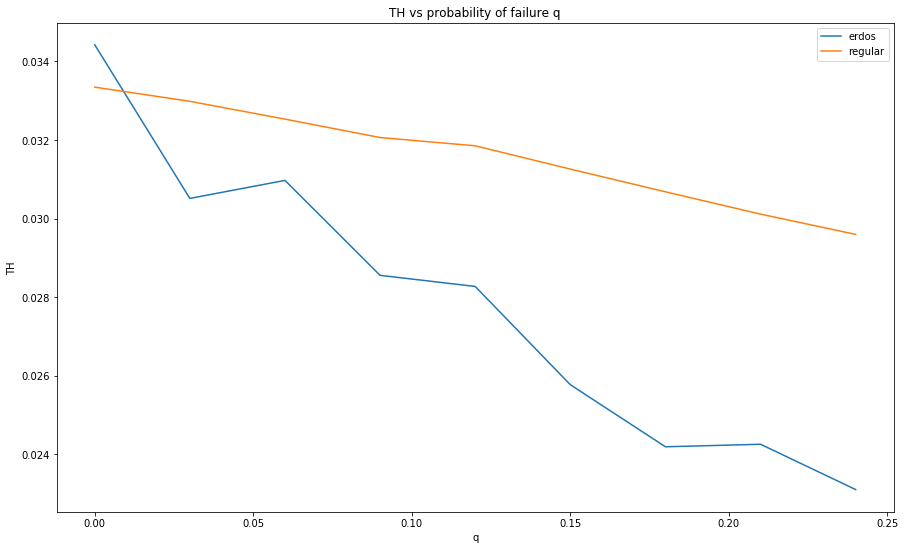

In [200]:
plot_TH_with_fail()